In [214]:
import matplotlib.pyplot as plt
import math
import numpy as np

print('Problem 1(a)')
#Let N = minimum number of iterations required to get into 0.00001

a = 2
x0_values = [2,0.7, 1, 1.5, 2, 3, 67, 123000, 7906500];

data = [];

for x0 in x0_values:
    y = x0;
    z = y*(y*y+3*a)/(3*y*y+a);
    count = 0;
    while True:
        count += 1;
        y = z;
        z = y*(y*y+3*a)/(3*y*y+a);
        #print(z);
        if abs(y-z) <= 0.00001:
            print('For x0 = '+ str(x0)+' we have N = '+str(count));
            break;

print('--------------------------\n')
print('Problem 1(b)')

root = 1.4143

z = 678;
p=-1;
epsilon = 1e-5;

for i in range(10000):
        y = z;
        z = y*(y*y+3*a)/(3*y*y+a);
        #print(z);
        if abs(y-z)<epsilon:
            break;
        data.append(z);
        p+=1;
        #print(z);

if p>5:
    A = abs((data[p]-data[p-1])/(data[p-1]-data[p-2]))
    B = abs((data[p-1]-data[p-2])/(data[p-2]-data[p-3]))
    print('Order of Convergence = '+str(math.log(A)/math.log(B)));


Problem 1(a)
For x0 = 2 we have N = 2
For x0 = 0.7 we have N = 3
For x0 = 1 we have N = 2
For x0 = 1.5 we have N = 2
For x0 = 2 we have N = 2
For x0 = 3 we have N = 3
For x0 = 67 we have N = 6
For x0 = 123000 we have N = 13
For x0 = 7906500 we have N = 16
--------------------------

Problem 1(b)
Order of Convergence = 2.620121769607603


In [215]:
import matplotlib.pyplot as plt
import math
import numpy as np

print('Problem 2')

def f(t):
    return abs(math.tan(math.pi - t)-t);
f1 = np.vectorize(f);

N_values = [10,100,1000,10000,100000];

for N in N_values:
    x = np.linspace(1.6,3,N);
    minif = f(1.6);
    t = 1.6;
    for i in range(N):
        if f(x[i])<minif:
            minif = f(x[i]);
            t = x[i];
    print('For N = '+str(N)+', minimum(f(x)) = '+str(minif)+ ' and for minimum x = '+str(t));


Problem 2
For N = 10, minimum(f(x)) = 0.2180751384658275 and for minimum x = 2.066666666666667
For N = 100, minimum(f(x)) = 0.027829361774606376 and for minimum x = 2.0242424242424244
For N = 1000, minimum(f(x)) = 0.0004341168810810814 and for minimum x = 2.028828828828829
For N = 10000, minimum(f(x)) = 0.0002138587125948277 and for minimum x = 2.028722872287229
For N = 100000, minimum(f(x)) = 2.1714899148594924e-05 and for minimum x = 2.0287542875428755


In [216]:
import matplotlib.pyplot as plt
import math
import numpy as np

print('Problem 3')

def f(t):
    return t/2 - math.sin(t);

def prime(t):
    return 1/2 - math.cos(t);
maxIterations = 100000;
count = 0;

a = math.pi/2;
b = math.pi;

t_values = [0.001,0.00001, 1e-7];

print('Bisection Method:');
for tolerance in t_values:
    while True:
        if count>=100000:
            print('max Iterations exceeded!');
            break;
        c = (a+b)/2;
        if f(c)==0 or abs(f(c))<=tolerance:
            print('root = '+str(c)+' in '+str(count)+' iterations with tolerance = '+str(tolerance));
            break;
        else:
            if f(c)*f(a) > 0:
                a = c;
            else:
                b = c;
        count+=1;

print('--------------- \n Newton Method\n');

count = 0;
left_interval = math.pi/2;
right_interval = math.pi;
epsilon       = 1e-10
for tolerance in t_values:
    x0 = math.pi/2;#initial guess
    x1 = x0 - f(x0)/prime(x0);
    while True:
        #print(x1)
        if count>=100000:
            print('max Iterations exceeded!');
            break;
        
        if x1 > right_interval or x1 < left_interval:
            print('method Overflowed the bound interval!');
            break;

        if abs(1-2*math.cos(x0))<epsilon:
            print('Denominator became too small!');
            break;

        if abs(x0-x1)<=tolerance:
            print('root = '+str(x1)+' in '+str(count)+' iterations with tolerance = '+str(tolerance));
            break;
        count+=1;
        x0 = x1;
        x1 = x0 - f(x0)/prime(x0);


Problem 3
Bisection Method:
root = 1.8960002538266523 in 7 iterations with tolerance = 0.001
root = 1.8954969163806275 in 15 iterations with tolerance = 1e-05
root = 1.8954942948314295 in 21 iterations with tolerance = 1e-07
--------------- 
 Newton Method

root = 1.8954942672087132 in 3 iterations with tolerance = 0.001
root = 1.895494267033981 in 7 iterations with tolerance = 1e-05
root = 1.895494267033981 in 11 iterations with tolerance = 1e-07


In [222]:
import matplotlib.pyplot as plt
import math
import numpy as np

print('Problem 4')

def f(t):
    return t/2 - math.sin(t);

def prime(t):
    return 1/2 - math.cos(t);
maxIterations = 100000;
count = 0;

a = math.pi/2;
b = math.pi;

t_values = [0.001,0.00001, 1e-7];

print('Bisection Method:');
for tolerance in t_values:
    while True:
        if count>=100000:
            print('max Iterations exceeded!');
            break;
        c = (a+b)/2;
        if f(c)==0 or abs(f(c))<=tolerance:
            print('root = '+str(c)+' in '+str(count)+' iterations with tolerance = '+str(tolerance));
            break;
        else:
            if f(c)*f(a) > 0:
                a = c;
            else:
                b = c;
        count+=1;

print('--------------- \n Fixed Point Iteration Method\n');

count = 0;
def g(t):
    return 2*math.sin(t);

for tolerance in t_values:
    x0 = math.pi/2;
    x1 = g(x0);
    data = [];
    while True:
        if count>=100000:
            print('max Iterations exceeded!');
            break;
        count+=1;
        x0 = x1;
        x1 = g(x0);
        data.append(x1);
        if abs(x1-x0)<=tolerance:
            print('root = '+str(x1)+' in '+str(count)+' iterations with tolerance = '+str(tolerance));
            break;
        
    if len(data)>4:
        p = len(data)-1;
        A = abs((data[p]-data[p-1])/(data[p-1]-data[p-2]))
        B = abs((data[p-1]-data[p-2])/(data[p-2]-data[p-3]))
        print('Order of Convergence in this case = '+ str(math.log(A)/math.log(B)));


Problem 4
Bisection Method:
root = 1.8960002538266523 in 7 iterations with tolerance = 0.001
root = 1.8954969163806275 in 15 iterations with tolerance = 1e-05
root = 1.8954942948314295 in 21 iterations with tolerance = 1e-07
--------------- 
 Fixed Point Iteration Method

root = 1.8951742279274637 in 13 iterations with tolerance = 0.001
Order of Convergence in this case = 1.002413376758368
root = 1.8954906894347723 in 36 iterations with tolerance = 1e-05
Order of Convergence in this case = 1.0000269944883338
root = 1.8954942925583511 in 70 iterations with tolerance = 1e-07
Order of Convergence in this case = 0.9999998066195256


Problem 5: Secant Method


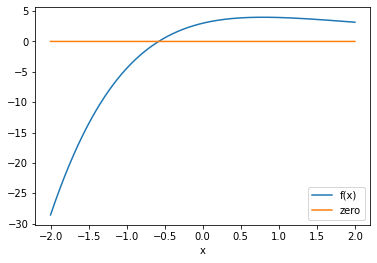

Secant algorithm says:
root = -0.5791589060508088 in 6 iterations!


In [218]:
import matplotlib.pyplot as plt
import math
import numpy as np

print('Problem 5: Secant Method')

def f(t):
    return 1 + np.exp(-t)*(t**2 + 5*t + 2);

x0 = -1

#Let us plot the graph first
def zer(t):
    return 0;
zer1 = np.vectorize(zer);
x = np.linspace(-2,2,10000);
f1 = np.vectorize(f);
plt.plot(x, f1(x), label='f(x)');
plt.plot(x, zer1(x), label='zero');
plt.xlabel('x');
plt.legend();
plt.show();

#Thus the root is somewhere between -1.0 and 0.0

print('Secant algorithm says:');

st_values = [1e-5];

for stopping in st_values:
    count=0;
    x0 = -1.0;
    x1 = 0.0;
    x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0));
    while True:
        x0 = x1;
        x1 = x2;
        if f(x1)==f(x0):
            print('method Fails!');
            break;
        count+=1;
        x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0));
        if abs(x2-x1)<=stopping*(abs(x2)):
            print('root = '+str(x2)+' in '+str(count)+' iterations!');
            break;
        if count>=100000:
            print('max Iterations exceeded!');
            break;


In [9]:
import matplotlib.pyplot as plt
import math
import numpy as np

print('Problem 6:')

def f(t):
    return 1 + np.exp(-t)*(t**2 + 5*t + 2);

a = -1;
b = 0;

t_values = [1e-3]

print('Bisection Method:');

root = -1;
for tolerance in t_values:
    while True:
        if count>=100000:
            print('max Iterations exceeded!');
            break;
        c = (a+b)/2;
        if f(c)==0 or abs(f(c))<=tolerance:
            root = c;
            print('root = '+str(c)+' in '+str(count)+' iterations with tolerance = '+str(tolerance));
            break;
        else:
            if f(c)*f(a) > 0:
                a = c;
            else:
                b = c;
        count+=1;

print('approximation of root = '+str(root));
#now we do the modification according to the recursion given in the question;

iterations = 40;
data = [-1]*iterations;
last = 0;
x0 = 20;
x1 = (root*f(x0)-x0*f(root))/(f(x0)-f(root));
for i in range(iterations):
    if abs(f(x1)-f(x0))<1e-5 or abs(x1-x0)<1e-5:
        break;
    t = x1;
    x1 = (t*f(x0)-x0*f(t))/(f(x0)-f(t));
    x0 = t
    data[i] = x1;
    last = i;
    
#print(data);

p = last;
A = abs((data[p]-data[p-1])/(data[p-1]-data[p-2]))
B = abs((data[p-1]-data[p-2])/(data[p-2]-data[p-3]))
print('Order of Convergence of 2nd part = '+ str(math.log(A)/math.log(B)));

Problem 6:
Bisection Method:
root = -0.5791015625 in 52 iterations with tolerance = 0.001
approximation of root = -0.5791015625
Order of Convergence of 2nd part = 0.8644352421324487


In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np

print('Problem 7:')

def f(t):
    return t/2 - math.sin(t);
count = 0;

a = math.pi/2;
b = math.pi;

t_values = [1e-4]

print('Bisection Method:');

root = -1;
for tolerance in t_values:
    while True:
        if count>=100000:
            print('max Iterations exceeded!');
            break;
        c = (a+b)/2;
        if f(c)==0 or abs(f(c))<=tolerance:
            root = c;
            print('root = '+str(c)+' in '+str(count)+' iterations with tolerance = '+str(tolerance));
            break;
        else:
            if f(c)*f(a) > 0:
                a = c;
            else:
                b = c;
        count+=1;

print('approximation of root = '+str(root));
#now we do the modification according to the recursion given in the question;

iterations = 40;
data = [-1]*iterations;
last = 0;
x0 = 20;
x1 = (root*f(x0)-x0*f(root))/(f(x0)-f(root));
for i in range(iterations):
    if abs(f(x1)-f(x0))<1e-5 or abs(x1-x0)<1e-5:
        break;
    t = x1;
    x1 = (t*f(x0)-x0*f(t))/(f(x0)-f(t));
    x0 = t
    data[i] = x1;
    last = i;
    
#print(data);

p = last;
A = abs((data[p]-data[p-1])/float(data[p-1]-data[p-2]))
B = abs((data[p-1]-data[p-2])/float(data[p-2]-data[p-3]))
print('Order of Convergence of 2nd part = '+ str(math.log(A)/math.log(B)));

Problem 7:
Bisection Method:
root = 1.8954250110311952 in 12 iterations with tolerance = 0.0001
approximation of root = 1.8954250110311952
Order of Convergence of 2nd part = 0.9156364708429194


In [227]:
import matplotlib.pyplot as plt
import math
import numpy as np

print('Problem 8:')

def f(t):
    return 1 + np.exp(-t)*(t**2 + 5*t + 2);

a = -1;
b = 0;

t_values = [1e-3, 1e-5, 1e-7]

print('Bisection Method:');

root = -1;
for tolerance in t_values:
    while True:
        if count>=100000:
            print('max Iterations exceeded!');
            break;
        c = (a+b)/2;
        if f(c)==0 or abs(f(c))<=tolerance:
            root = c;
            print('root = '+str(c)+' in '+str(count)+' iterations with tolerance = '+str(tolerance));
            break;
        else:
            if f(c)*f(a) > 0:
                a = c;
            else:
                b = c;
        count+=1;

print('approximation of root = '+str(root));
#now we do the modification according to the recursion given in the question;

iterations = 50;
x0 = 0;
x1 = x0 - (f(x0)**2)/(f(x0)-f(x0-f(x0)));
print('------------ \n Let us iterate with x0 = 0:')

data = [-1]*iterations;
last = 0;
for i in range(iterations):
    if f(x0)==f(x0-f(x0)):
        print('invalid!');
        break;
    x0 = x1;
    x1 = x0 - (f(x0)**2)/(f(x0)-f(x0-f(x0)));
    if abs(x1-x0)<1e-6:
        #print(i);
        break;
    data[i]=x1;
    last = i;
    
    
#print(data);

p=last;
A = abs((data[p]-data[p-1])/(data[p-1]-data[p-2]))
B = abs((data[p-1]-data[p-2])/(data[p-2]-data[p-3]))
print('Order of Convergence of 2nd part = '+ str(math.log(A)/math.log(B)));

Problem 8:
Bisection Method:
root = -0.5791015625 in 43 iterations with tolerance = 0.001
root = -0.5791587829589844 in 51 iterations with tolerance = 1e-05
root = -0.5791589021682739 in 56 iterations with tolerance = 1e-07
approximation of root = -0.5791589021682739
------------ 
 Let us iterate with x0 = 0:
Order of Convergence of 2nd part = 2.0801163950983437
